In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.keys()

#Call data and target
#image data format 28 x 28 = 784

X = mnist['data']
y= mnist['target']

print("X: ", X.shape)
print("y: ", y.shape)

X:  (70000, 784)
y:  (70000,)


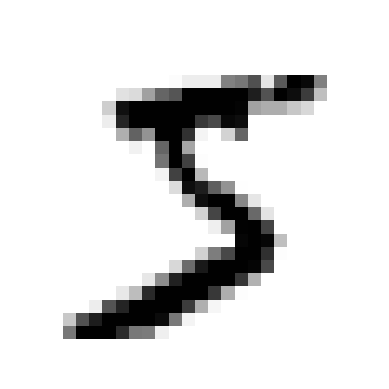

In [116]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')
plt.show()
y = y.astype(np.uint8)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

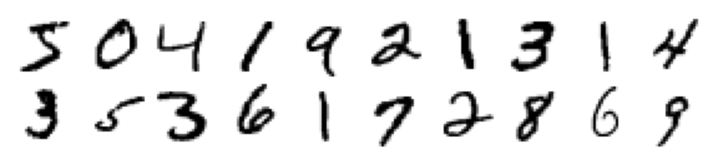

In [117]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()
    
def plot_digit(data, image_per_row: int):
    size = 28
    image_per_row = min(len(data), image_per_row)
    n_row = (len(data) - 1) // image_per_row + 1
    n_empty = n_row * image_per_row - len(data)
    padded_instances = np.concatenate([data, np.zeros((n_empty, 28 * 28))], axis = 0)
    
    #배열의 크기를 28*28 이미지 그리드로 변경
    image_grid = padded_instances.reshape((n_row, image_per_row, size, size))
    
    #transpose( samples, image_per_row, row, cols) into (samples, rows, image_per_row)
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_row * size, image_per_row*size)
    plt.imshow(big_image, cmap=mpl.cm.binary)
    plt.axis("off")
    return big_image
     
plt.figure(figsize=(9,9))
example_images = X[:20]
plot_digit(example_images, image_per_row=10)

In [87]:
X_train, X_test, y_train, y_test = X[:56000], X[56000:], y[:56000], y[56000:]

In [126]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_test_5

14000

In [120]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([X[0]])

array([ True])

In [127]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, y_train_5, y=y_test_5, cv=3, scoring="accuracy")

ValueError: Found input variables with inconsistent numbers of samples: [56000, 14000]

In [118]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y=y_train_5, cv=3)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)
cm[1, 1]/ (cm[0 ,1] + cm[1, 1]) #precision

recall_score(y_train_5, y_train_pred)
cm[1, 1]/ (cm[1 ,0] + cm[1, 1]) #recall

f1_score(y_train_5, y_train_pred)
cm[1, 1]/ (cm[0 ,1] + cm[1, 1])

0.8241500586166471